# Assignment 4

### 1. 复习上课内容以及复现课程代码

在本部分，你需要复习上课内容和课程代码后，自己复现课程代码。

### 2. 回答一下理论题目

#### 1. What does a neuron compute?

Ans:神经元有输入和输出，神经元在接收输入后，经过加工和计算，把计算的结果从输出传输到下一个神经元，以此类推

####  2. Why we use non-linear activation funcitons in neural networks?

Ans:如果激活函数也是线性的，经过数学归纳和整理，多层神经网络会被有化成单层神经网络。

#### 3. What is the 'Logistic Loss' ?

Ans: logistic Loss为Logistic Regression中使用的损失函数。在Logistic Regression我们使用sigmoid函数把矩阵运算的结果落在0和1之间，就可以简单的理解为输出的概率，概率大于50%就为真，这个结果越接近1，则表明结果越真；概率小于50%就为假，这个结果越接近0，则表明结果越假。

通过数学归纳，就得到了Logistic Regression的损失函数logistic Loss，Loss=-(y*log(y_hat) + (1-y)log(1-y_hat))
这个函数可以在y_hat越大的时候接近于1，在y_hat越小的时候接近于0

#### 4. Assume that you are building a binary classifier for detecting if an image containing cats, which activation functions would you recommen using for the output layer ?

A. ReLU    
B. Leaky ReLU    
C. sigmoid    
D. tanh  

ans: C,D

sigmoid：这个结果在0和1之间，越接近1表明为真，越接近0表明为假

tanh：这个结果在-1和1之间，越接近1表明为真，越接近-1表明为假

#### 5. Why we don't use zero initialization for all parameters ?

Ans:使用0初始化所有的参数会导致前向传播和反向传播的结果都为0，这个结果没有意义，也形成了神经网络的对称性问题。

#### 6. Can you implement the softmax function using python ? 

In [1]:
import numpy as np

def softmax(z):
    E = sum(np.exp(z[i]) for i in range(len(z)))
    
    return [np.exp(z[i])/E for i in range(len(z))]

In [2]:
#优化
def softmax_1(z):
    return np.exp(z) / np.sum(np.exp(z))

In [3]:
#第五节课PPT的写法
def softmax_2(array):
    array -= np.max(array)
    
    return np.exp(array) / np.sum(np.exp(array))

In [4]:
a = [1,2,4,4]
print(softmax(a))
print(np.exp(1)/(np.exp(1) + np.exp(2) + np.exp(4) + np.exp(4)))
print(np.exp(2)/(np.exp(1) + np.exp(2) + np.exp(4) + np.exp(4)))
print(np.exp(3)/(np.exp(1) + np.exp(2) + np.exp(4) + np.exp(4)))
print(np.exp(4)/(np.exp(1) + np.exp(2) + np.exp(4) + np.exp(4)))
b = [[1],[2],[4],[4]]
print(softmax(b))
print(np.array(b).shape)
print(np.max(b))
b -= np.max(b)
print(b)

[0.02278456779836911, 0.061934876615599876, 0.4576402777930155, 0.4576402777930155]
0.02278456779836911
0.061934876615599876
0.1683564496520382
0.4576402777930155
[array([0.02278457]), array([0.06193488]), array([0.45764028]), array([0.45764028])]
(4, 1)
4
[[-3]
 [-2]
 [ 0]
 [ 0]]


### 3.实践题

#### In this practical part, you will build a simple digits recognizer to check if the digit in the image is larger than 5. This assignmnet will guide you step by step to finish your first small project in this course .

#### 1 - Packages  
sklearn is a famous package for machine learning.   
matplotlib is a common package for vasualization.

In [6]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#### 2 - Overvie of the dataset  
    - a training set has m_train images labeled as 0 if the digit < 5 or 1 if the digit >= 5
    - a test set contains m_test images labels as if the digit < 5 or 1 if the digit >= 5
    - eah image if of shape (num_px, num_px ). Thus, each image is square(height=num_px and  width = num_px)

In [7]:
# Loading the data 
digits = datasets.load_digits()

In [8]:
#图片
len(digits.data)
#图片表示的数字
len(digits.target)

1797

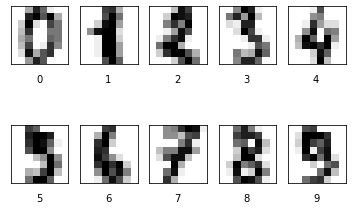

In [9]:
# Vilizating the data
for i in range(1,11):
    plt.subplot(2,5,i)
    plt.imshow(digits.data[i-1].reshape([8,8]),cmap=plt.cm.gray_r)
    plt.text(3, 10,str(digits.target[i-1]))
    #X轴说明
    plt.xticks([])
    #Y轴说明
    plt.yticks([])
plt.show()

In [10]:
# Split the data into training set and test set 
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25)

In [11]:
# reformulate the label. 
# If the digit is smaller than 5, the label is 0.
# If the digit is larger than 5, the label is 1.

y_train[y_train < 5 ] = 0
y_train[y_train >= 5] = 1
y_test[y_test < 5] = 0
y_test[y_test >= 5] = 1

In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train[0])
print(X_train[1])

(1347, 64)
(450, 64)
(1347,)
(450,)
0
[ 0.  0.  0.  1. 15.  2.  0.  0.  0.  0.  0.  6. 14.  0.  0.  0.  0.  0.
  0. 11.  9.  0.  6.  0.  0.  0.  6. 15.  1. 11. 15.  0.  0.  5. 16. 14.
 10. 16.  8.  0.  1. 15. 16. 16. 16. 16.  3.  0.  0.  3.  7.  5. 13. 11.
  0.  0.  0.  0.  0.  0. 15.  3.  0.  0.]


#### 3- Architecture of the neural network

![title](./networks.png)

In [9]:
!pwd

'pwd' �����ڲ����ⲿ���Ҳ���ǿ����еĳ���
���������ļ���


##### Mathematical expression of the algorithm:

For one example $x^{(i)}$:   
 $$ z^{(i)} = w^T * x^{(i)} +b $$   
 $$ y^{(i)} = a^{(i)} = sigmoid(z^{(i)})$$   
 $$L(a^{(i)},y^{(i)}) = -y^{(i)} log(a^{(i)})-(1-y^{(i)})log(1-a^{(i)})$$

The total cost over all training examples:
$$ J = \frac{1}{m}\sum_{i=1}^{m}L(a^{(i)},y^{(i)}) $$

#### 4 - Building the algorithm

##### 4.1- Activation function    
###### Exercise:
Finish the sigmoid funciton 

In [13]:
def sigmoid(z):
    '''
    Compute the sigmoid of z
    Arguments: z -- a scalar or numpy array of any size.
    
    Return:
    s -- sigmoid(z)
    '''
    s = 1./(1 + np.exp(-1 * z))
    
    return s

In [14]:
# Test your code 
# The result should be [0.5 0.88079708]
print("sigmoid([0,2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0,2]) = [0.5        0.88079708]


##### 4.1-Initializaing parameters
###### Exercise:
Finishe the initialize_parameters function below

In [15]:
# Random innitialize the parameters
import random

def initialize_parameters(dim):
    '''
    Argument: dim -- size of the w vector
    
    Returns:
    w -- initialized vector of shape (dim,1)
    b -- initializaed scalar
    '''
    
    #w = np.random.randn(dim, 1)
    w = np.zeros((dim, 1))
    b = 0

    assert(w.shape == (dim,1))
    assert(isinstance(b,float) or isinstance(b,int))
    
    return w,b

#### 4.3-Forward and backward propagation

###### Some mathematical expressions
Forward Propagation:   
. X

. Z = $ w^T*X+b$

. A = $\sigma(w^T*X+b) = (a^{(1)},a^{(2)},...,a^{(m)}$   
. J = $-\frac{1}{m} \sum_{i=1}^{m}y^{(i)}log(a^{(i)})+(1-y^{(i)})log(1-a^{(i)})$       

Some derivative: 
$$\frac{\partial{J}}{\partial{w}} = \frac{1}{m}X*(A-Y)^T$$
$$\frac{\partial{J}}{\partial{b}} = \frac{1}{m}\sum_{i=1}^m(a^{(i)}-y^{(i)}) $$

Some derivative: 
$$\frac{\partial{J}}{\partial{w}} = \frac{\partial{J}}{\partial{a}} * \frac{\partial{a}}{\partial{z}} * \frac{\partial{z}}{\partial{w}}= \frac{1}{m}\sum_{i=1}^mX*(A-Y)$$
$$\frac{\partial{J}}{\partial{b}} = \frac{\partial{J}}{\partial{a}} * \frac{\partial{a}}{\partial{z}} * \frac{\partial{z}}{\partial{b}}= \frac{1}{m}\sum_{i=1}^m(a^{(i)}-y^{(i)}) $$

###### Exercise:
Finish the function below:

In [16]:
def propagate(w,b,X,Y):
    '''
    Implement the cost function and its gradient for the propagation
    
    Arguments:
    w - weights
    b - bias
    X - data
    Y - ground truth
    '''

    #测试数据的个数
    m = X.shape[0]
    
    #W.T(1,64) * X.T(64,1347)
    A = sigmoid(np.dot(w.T, X.T) + b)
    #A(1,1347)

    cost = sum([-1 / m * (Y[i] * np.log(A[0][i]) + (1- Y[i]) * np.log(1- A[0][i])) for i in range(len(Y))])
    
    #A.T(1347,1) - Y(1347,1)
    #X.T(64,1347)
    dw = 1 / m * np.dot(X.T,(A.T - np.array(Y).reshape((len(Y),1)) ))
    #dw(64,1)

    db = sum([1 / m *(A[0][i] - Y[i]) for i in range(len(Y))])
    #db(1,)
    
    db = np.squeeze(db)
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    
    #删除cost数组维度
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {'dw':dw,
             'db':db}
    return grads, cost

##### 4.4 -Optimization

###### Exercise:
Minimizing the cost function using gradient descent.   
$$\theta = \theta - \alpha*d\theta$$ where $\alpha$ is the learning rate.

In [17]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost=False):
    '''
    This function optimize w and b by running a gradient descen algorithm
    
    Arguments:
    w - weights
    b - bias
    X - data
    Y - ground truth
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params - dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    '''
    
    costs = []
    cost = 0.

    for i in range(num_iterations):
        #X_batch(16,64)
        #Y_batch(16,)
        grads, cost = propagate(w,b,X_train,y_train)
        
        dw = grads['dw']
        db = grads['db']
        w = w - 1 * dw * learning_rate
        b = b - 1 * db * learning_rate

        if i % 100 == 0:
            costs.append(cost)
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w":w,
              "b":b}
    
    grads = {"dw":dw,
             "db":db}
    
    return params, grads, costs

###### Exercise
The previous function will output the learned w and b. We are able to use w and b to predict the labels for a dataset X. Implement the predict() function.    
Two steps to finish this task:   
1. Calculate $\hat{Y} = A = \sigma(w^T*X+b)$   
2. Convert the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector Y_prediction. If you wish, you can use an if/else statement in a for loop (though there is also a way to vectorize this).

In [18]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights
    b -- bias 
    X -- data 
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    m = X.shape[0]
    Y_prediction = np.zeros((1,m))
    
    A = sigmoid(np.dot(w.T, X.T) + b)

    for i in range(A.shape[1]):
        if(A[0][i] >= 0.5):
             Y_prediction[0][i] = 1
        else:
             Y_prediction[0][i] = 0
    assert(Y_prediction.shape == (1,m))
    
    return Y_prediction

##### 5- Merge all functions into a model

Congratulations !! You have finished all the necessary components for constructing a model. Now, Let's take the challenge to merge all the implemented function into one model.

In [19]:
def model(X_train, Y_train, X_test, Y_test, num_iterations, learning_rate,print_cost):
    """
    Build the logistic regression model by calling all the functions you have implemented.
    Arguments:
    X_train - training set
    Y_train - training label
    X_test - test set
    Y_test - test label
    num_iteration - hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d - dictionary should contain following information w,b,training_accuracy, test_accuracy,cost
    eg: d = {"w":w,
             "b":b,
             "training_accuracy": traing_accuracy,
             "test_accuracy":test_accuracy,
             "cost":cost}
    """
    d = {}

    w, b = initialize_parameters(X_train.shape[1])
    #print(w)
    #print(b)
    params, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost=print_cost)

    Y_train_prediction = predict(params['w'],params['b'],X_train)

    Y_test_prediction = predict(params['w'],params['b'],X_test)
    
    count = 0
    
    for i in range(len(Y_test)):
        if Y_test_prediction[0][i] == Y_test[i]:
            count += 1
    

    d['w'] = params['w']
    d['b'] = params['b']
    d['train_accuracy'] = 1 - np.mean(np.abs(Y_train_prediction - np.array(Y_train).reshape(1, len(Y_train))))
    d['test_accuracy1'] = count / len(Y_test)
    d['test_accuracy'] = 1 - np.mean(np.abs(Y_test_prediction - np.array(Y_test).reshape(1, len(Y_test))))
    d['cost'] = costs
    return d

In [69]:
d = model(X_train, y_train, X_test, y_test, num_iterations = 500, learning_rate = 1e-2,print_cost = True)
print(d)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.377169
Cost after iteration 200: 0.311500
Cost after iteration 300: 0.273153
Cost after iteration 400: 0.266273
{'w': array([[ 0.00000000e+00],
       [-1.22082998e-02],
       [ 1.02322344e-02],
       [-1.94684094e-02],
       [ 5.77788099e-02],
       [ 1.27034443e-01],
       [ 1.54267579e-01],
       [-1.11018851e-02],
       [ 1.18375588e-02],
       [-7.81804510e-02],
       [ 1.24922761e-01],
       [ 7.34276329e-02],
       [-7.34860155e-03],
       [-6.48235607e-02],
       [ 1.42365516e-02],
       [ 9.56198158e-03],
       [ 1.67372879e-03],
       [ 7.17264379e-02],
       [ 1.58408143e-01],
       [-5.59210348e-02],
       [-2.38139821e-01],
       [-5.76072153e-02],
       [-1.74540852e-01],
       [-2.34395619e-02],
       [ 0.00000000e+00],
       [-1.33347109e-01],
       [ 2.81864196e-02],
       [ 1.98232119e-01],
       [ 4.18740428e-02],
       [ 1.97842477e-01],
       [-1.18315043e-01],
       [-4.8158

[0.6931471805599223, 0.3771688293013002, 0.3114997217601828, 0.27315314373833605, 0.2662725649302235]


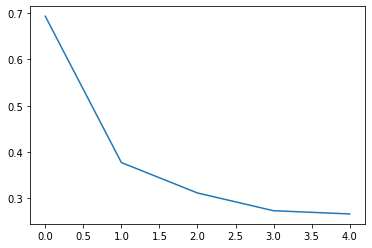

In [70]:
print((d['cost']))
plt.plot(d['cost'])
plt.show()

### 4.选做题

Congratulations on building your first logistic regression model. It is your time to analyze it further.

##### 4.1 Observe the effect of learning rate on the leraning process.   
Hits: plot the learning curve with different learning rate

In [71]:
d1 = model(X_train, y_train, X_test, y_test, num_iterations = 500, learning_rate = 1e-2,print_cost = False)

d2 = model(X_train, y_train, X_test, y_test, num_iterations = 500, learning_rate = 1e-3,print_cost = False)

d3 = model(X_train, y_train, X_test, y_test, num_iterations = 500, learning_rate = 1e-4,print_cost = False)
print('finished!')

finished!


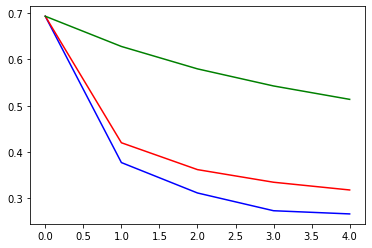

In [72]:
#learning_rate = 1e-2 --> blue
plt.plot(d1['cost'],color='blue')

#learning_rate = 1e-3 --> red
plt.plot(d2['cost'],color='red')

#learning_rate = 1e-4 --> green
plt.plot(d3['cost'],color='green')
plt.show()

#learning_rate越大下降速度越快

##### 4.2 Observe the effect of iteration_num on the test accuracy.

In [73]:
num4 = 10
d4 = model(X_train, y_train, X_test, y_test, num_iterations = num4, learning_rate = 1e-2,print_cost = False)

num5 = 50
d5 = model(X_train, y_train, X_test, y_test, num_iterations = num5, learning_rate = 1e-2,print_cost = False)

num6 = 100
d6 = model(X_train, y_train, X_test, y_test, num_iterations = num6, learning_rate = 1e-2,print_cost = False)

num7 = 500
d7 = model(X_train, y_train, X_test, y_test, num_iterations = num7, learning_rate = 1e-2,print_cost = False)
print('finished!')

finished!


In [74]:
print('在学习率相同(1e-2)的情况下：')
print('经过{}次学习，测试准确率{}'.format(num4,d4['test_accuracy']))
print('经过{}次学习，测试准确率{}'.format(num5,d5['test_accuracy']))
print('经过{}次学习，测试准确率{}'.format(num6,d6['test_accuracy']))
print('经过{}次学习，测试准确率{}'.format(num7,d7['test_accuracy']))
print('即：学习次数越多准确率越高，但到一定次数时，准确率上升不大，考虑可能与模型有关系')

在学习率相同(1e-2)的情况下：
经过10次学习，测试准确率0.508888888888889
经过50次学习，测试准确率0.8022222222222222
经过100次学习，测试准确率0.8288888888888889
经过500次学习，测试准确率0.88
即：学习次数越多准确率越高，但到一定次数时，准确率上升不大，考虑可能与模型有关系


# Challenge ! ! !

The original data have images labeled 0,1,2,3,4,5,6,7,8,9. In our logistic model, we only detect if the digit in the image is larger or smaller than 5. Now, Let's go for a more challenging problem. Try to use softmax function to build a model to recognize which digit (0,1,2,3,4,5,6,7,8,9) is in the image.

###### Some mathematical expressions
Forward Propagation:   
. X

. Z = $ w^T*X+b$

. A= $softmax(w^T*X+b) = (a^{(1)},a^{(2)},...,a^{(m)}$

. E = $ (e^{a1},e^{a2},...,e^{an})$

. J = $-\frac{1}{m} \sum_{j=1}^{m}  \sum_{i=1}^{n} y^{i} log(a^{i})$

真实值y^i = \[0,0,0,0,0,0,0,0,1,0] 第九个为1

单个损失函数可以简化为J = -1*log(a9)

M个损失函数可以简化为 J = -1/m*sum(log(ai))

Some derivative: 
$$\frac{\partial{J}}{\partial{A}} = - \frac{1}{m} \sum_{j=1}^m\frac{y^{i}}{S^{i}} $$

$$\frac{\partial{A}}{\partial{Z}} = a^{T} * (I - a^{T}) $$
$$\frac{\partial{Z}}{\partial{w}} = x $$
$$\frac{\partial{Z}}{\partial{b}} = 1 $$

Some derivative: 
$$\frac{\partial{J}}{\partial{w}} = \frac{\partial{J}}{\partial{a}} * \frac{\partial{a}}{\partial{z}} * \frac{\partial{z}}{\partial{w}} $$
$$\frac{\partial{J}}{\partial{b}} = \frac{\partial{J}}{\partial{a}} * \frac{\partial{a}}{\partial{z}} * \frac{\partial{z}}{\partial{b}} $$

In [20]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25)

#把训练值和测试值设置成十分类结果
y_train_fix = np.array([ [1 if y_train[i] == j else 0  for j in range(10) ] for i in range(y_train.shape[0])]).reshape(y_train.shape[0],10)
y_test_fix = np.array([ [1 if y_test[i] == j else 0  for j in range(10) ] for i in range(y_test.shape[0])]).reshape(y_test.shape[0],10)

In [21]:
print(X_train[0])
print(y_train[0])
print(y_train_fix.shape)
print(y_train_fix[0])
print()

[ 0.  0.  5. 14. 12.  5.  0.  0.  0.  0. 13. 16. 16.  9.  0.  0.  0.  0.
 11. 16. 16.  9.  0.  0.  0.  0. 11. 16. 16.  7.  0.  0.  0.  0. 10. 16.
 16.  2.  0.  0.  0.  0. 13. 16. 15.  0.  0.  0.  0.  0. 14. 16. 13.  0.
  0.  0.  0.  0.  7. 13. 16.  8.  0.  0.]
1
(1347, 10)
[0 1 0 0 0 0 0 0 0 0]



In [22]:
def initialize_parameters_sftmx(dim):

    w = np.random.rand(dim, 10)
    b = np.zeros((10,1))

    assert(w.shape == (dim,10))
    assert(b.shape == (10,1))
    
    return w,b

In [23]:
def propagate_sftmx(w,b,X,Y):
    #测试数据的个数
    m = X.shape[0]#1347
    
    #W.T(10,64) * X(64,1) + b(10,1)
    Z = np.dot(w.T, X) + b
    #Z(10,1)
    #print('Z:{}'.format(Z))

    A = np.array(softmax(Z)).reshape(10,1)
    #A(10,1)
    #print('A:{}'.format(A))

    #Y[10,1]
    cost = sum([-1 * Y[i] * np.log(A.T[0][i]) for i in range(len(Y))])
    #print('cost:{}'.format(cost))

    #损失函数对A得导数
    dl = [-1 * Y[i] / A.T[0][i]  for i in range(len(Y))]
    #da(10,1)
    #print('dl:{}'.format(dl))

    #softmax对Z得导数
    ds = np.dot(A,np.ones((1,10))) * (np.identity(10) - np.dot(np.ones((10,1)),A.T))
    #ds(10,10)
    #print('ds:{}'.format(ds))

    #ds(10,10) dl(10,1) 
    dz = (np.dot(ds,dl)).reshape(10,1)
    #dz(10,1)
    #print('dz:{}'.format(dz))

    #X(64,1) dz(10,1)
    dw = np.dot(X,dz.T)
    #dw(64,10)
    #print('dw:{}'.format(dw))

    db = dz * 1
    #db(10,1)
    #print('db:{}'.format(db))

    #assert('1' == '2')
    assert(dw.shape == w.shape)
    assert(db.shape == b.shape)
    
    #删除cost数组维度
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {'dw':dw,
             'db':db}
    return grads, cost

In [24]:
def optimize_sftmx(w, b, X, Y, num_iterations, learning_rate, print_cost=False):
    costs = []
    cost = 0.
    grads = []
    m = X.shape[0]
    for i in range(num_iterations):

        for j in range(X.shape[0]):
            xi = X[j].reshape(64,1)
            yi = Y[j]
            grads, cost = propagate_sftmx(w,b,xi,yi)

            dw = grads['dw']
            db = grads['db']
            w = w - 1 * dw * learning_rate
            b = b - 1 * db * learning_rate

            if (m * i + j) % 500 == 0:
                costs.append(cost)
            if print_cost and (m * i + j) % 500 == 0:
                print ("Cost after iteration %i: %f" %( m * i + j, cost))
         
        
    
    params = {"w":w,
              "b":b}
    
    grads = {"dw":dw,
             "db":db}
    
    return params, grads, costs

In [25]:
def predict_sftmx(w, b, X):
    Y_prediction = np.zeros(X.shape[0])
    for i in range(X.shape[0]):
        xi = X[i].reshape(64,1)

        #W.T(10,64) * X(64,1) + b(10,1)
        Z = np.dot(w.T, xi) + b
        #Z(10,1)
        A = list(softmax(Z))
        #A(10,1)
        index = A.index(max(A))
        
        Y_prediction[i] = index
    
    return Y_prediction

In [26]:
def model_sftmx(x_trn, y_trn, x_tst, y_tst, num_iterations, learning_rate,print_cost):
    d = {}

    w, b = initialize_parameters_sftmx(x_trn.shape[1])
    #print(w)
    #print(b)
    params, grads, costs = optimize_sftmx(w, b, x_trn, y_trn, num_iterations, learning_rate, print_cost=print_cost)

    Y_train_prediction = predict_sftmx(params['w'],params['b'],x_trn)
    tranret = Y_train_prediction - y_train
    tranret = np.where(tranret == 0,1,0)

    Y_test_prediction = predict_sftmx(params['w'],params['b'],x_tst)
    testret = Y_test_prediction - y_test
    testret = np.where(testret == 0,1,0)

    d['w'] = params['w']
    d['b'] = params['b']
    d['train_accuracy'] = np.mean(tranret)
    d['test_accuracy'] = np.mean(testret)
    d['cost'] = costs

    return d

In [27]:
d_sftmx = model_sftmx(X_train, y_train_fix, X_test, y_test_fix, num_iterations = 3, learning_rate = 1e-2,print_cost = True)
print(d_sftmx['train_accuracy'])
print(d_sftmx['test_accuracy'])

Cost after iteration 0: 3.540308
Cost after iteration 500: 0.000000
Cost after iteration 1000: 0.000000
Cost after iteration 1500: 0.000000
Cost after iteration 2000: 0.000000
Cost after iteration 2500: 0.000000
Cost after iteration 3000: 3.782448
Cost after iteration 3500: 0.000000
Cost after iteration 4000: 0.007971
0.9250185597624351
0.9066666666666666


[3.5403077188152814, 9.782596955200107e-11, 0.0, 0.0, 1.3540779609606255e-10, 0.0, 3.782447870715105, 1.8486629620354503e-08, 0.007971194366579181]


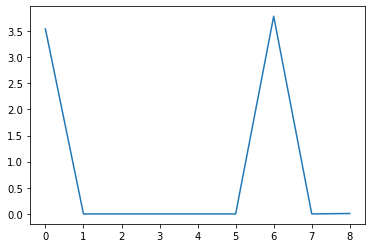

In [28]:
print((d_sftmx['cost']))
plt.plot(d_sftmx['cost'])
plt.show()

# Congratulations ! You have completed assigment 4. 